# Numerično reševanje diferencialnih enačb - začetni problem

In [1]:
import numpy as np
from ipywidgets import interact
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sym
sym.init_printing()

## Uvod


### Zapis (ene) diferencialne enačbe

Predpostavimo, da je mogoče diferencialno enačbo prvega reda zapisati v *eksplicitni* obliki:

$$y'=f(t, y),$$

kjer je $f(t, y)$ podana funkcija in velja $y'=dy/dx$.

Dodatno je podan začetni pogoj:

$$y(t_0)=y_0.$$

Cilj reševanja diferencialne enačbe je izračunati funkcijo $y(t)$, ki reši zgoraj definiran začetni problem. Ob določenih pogojih funkcije $f(t, y)$ ima začetni problem enolično rešitev na intevalu, ki vsebuje $t_0$.

Pri numeričnem reševanju vedno računamo tabelo funkcije $y(t_i)$, ki reši dan začetni problem. Pri tem so vozlišča $t_i$ običajno ekvidistantna:

$$t_0, t_0+h, t_0+2h,\dots$$

in $h$ imenujemo (časovni) korak (integracije).

Tukaj si bomo pogledali nekatere numerične metode za reševanje diferencialnih enačb pri začetnem pogoju.

## Eulerjeva metoda

**Eksplicitna Eulerjeva metoda** temelji na razvoju funkcije $y$ v Taylorjevo vrsto:

$$y(t+h)=y(t)+y'(t, y(t))\,h + 
\mathcal{O}(h^2).$$

Naredimo napako metode $\mathcal{O}(h^2)$, ker zanemarimo odvode drugega in višjih redov; sedaj lahko ob znani vrednosti $y(t)$ in odvodu $y'(t)=f(t,y)$ ocenimo vrednosti pri naslednjem časovnem koraku $t+h$. Ko imamo enkrat znane vrednosti pri $t+h$, ponovimo postopek!

Koraki Eulerjeve metode:

1. Postavimo $i=0$, $t_0$, $y_0=y(t_0)$.
2. Izračun vrednosti funkcije pri $t_{i+1}=t_i+h$: $y_{i+1}= y_i + f(t_i, y_i)\,h.$
3. $i=i+1$ in nadaljevanje v koraku 2.

Diferencialno enačbo rešujemo na intervalu $[t_0,t_n]$ in velja $h=(t_n-t_0)/n$. $n$ je število integracijskih korakov (kolikokrat izvedemo korak 2 v zgornjem algoritmu). 

Numerična rešitev začetnega problema:

$$y_0, y_1, y_2,\dots, y_{n}$$

pri vrednostih neodvisne spremenljivke:

$$t_0, t_1, t_2\, \dots \, t_n.$$

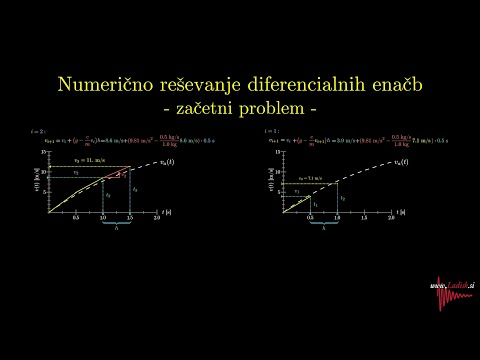

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('cfZ8v0b-R8o', width=800, height=300)

### Napaka Eulerjeve metode

Napaka Eulerjeve metode na vsakem koraku je reda $\mathcal{O}(h^2)$. 

Ker na intervalu od $t_0$ do $t_n$ tako napako naredimo $n$-krat, je kumulativna napaka $n\,\mathcal{O}(h^2)=\frac{t_n-t_0}{h}\,\mathcal{O}(h^2)=\mathcal{O}(h)$.

Lokalno je napaka drugega reda, globalno pa je napaka prvega reda in ker je Eulerjeva metoda tako nenatančna jo redko uporabljamo v praksi!

#### Ocena napake

Točna rešitev $y(t_n)$ pri velikosti koraka $h$ je:

$$y(t_n)=y_{n,h}+E_h,$$

kjer je $y_{n,h}$ numerični približek in $E_h$ napaka metode. Ker je globalna napaka prvega reda, lahko napako zapišemo kot:

$$E_h=k\,h.$$

Podobno lahko za velikost koraka $2h$ zapišemo:

$$y(t_n)=y_{n,2h}+E_{2h},$$

kjer je $y_{n,2h}$ numerični približek in $E_{2h}$ napaka metode:

$$E_{2h}=k\,2\,h.$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko določimo oceno napake pri boljšem približku $E_h$. Očitno velja:

$$y_{n,h}+k\,h=y_{n,2h}+2\,k\,h$$

nato določimo *oceno napake*:

$$E_h=k\,h=y_{n,h}-y_{n,2h}.$$

### Komentar na implicitno Eulerjevo metodo

Pri eksplicitni Eulerjevi metodi računamo rešitev pri $t_{i+1}$ iz izračunane vrednosti pri $t_i$.

V kolikor bi nastopala neznana vrednost rešitve pri $t_{i+1}$, to je $y_{i+1}$, tudi na desni strani, bi govorili o **implicitni Eulerjevi metodi** (ali *povratni Eulerjevi metodi*):

$$y_{i+1}=y_i+f(t_{i+1}, y_{i+1})\,h.$$

Ker se iskana vrednost $y_{i+1}$ nahaja na obeh straneh enačbe, moramo za določitev $y_{i+1}$ rešiti (nelinearno) enačbo. Prednost implicitne Eulerjeve metode je, da je bolj stabilna (npr. v primeru togih sistemov, ki jih bomo spoznali pozneje) kakor eksplicitna oblika, vendar pa je numerično bolj zahtevna (zaradi računanja rešitve enačbe).

### Numerična implementacija

Najprej uvozimo potrebne knjižnice:

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Nato definirajmo Eulerjevo metodo:

In [4]:
def euler(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema diferencialnih enačb: y' = f(t, y)
    
    :param f:  funkcija, ki vrne prvi odvod - f(t, y)
    :param t:  časovni vektor kjer računamo rešitev
    :param y0: začetna vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` vrednosti funkcije.
    """
    y = np.zeros_like(t)
    y[0] = y0        
    h = t[1]-t[0]
    for i in range(len(t)-1):
        y[i+1] = y[i] + f(t[i], y[i], *args, **kwargs) * h
    return y

Pripravimo funkcijo za oceno napake (v numeričnem smislu bi bilo bolje oceno napake vključiti v funkcijo `euler`, vendar jo zaradi jasnosti predstavimo ločeno):

In [5]:
def euler_napaka(f, t, y0, *args, **kwargs):
    """ Ocena napake Eulerjeve metode; argumenti so isti kakor za funkcijo `euler`
    """
    n = len(t)
    if n < 5:
        raise Exception('Vozlišč mora biti vsaj 5.')
    if n%2==0: # sodo vozlišč; odstrani eno točko in spremeni na liho (da je sodo odsekov)
        n = n - 1
    y_h = euler(f, t[:n], y0, *args, **kwargs)
    y_2h = euler(f, t[:n:2], y0, *args, **kwargs)
    E_h = y_h[-1] - y_2h[-1]
    return E_h

### Numerični zgled


Kot primer rešimo diferencialno enačbo, ki opisuje padanje telesa, ki je izpostavljeno sili teže in zračnemu uporu:
![Padanje telesa](./fig/padanje_telesa.png)

Glede na II. Newtonov zakon, lahko zapišemo diferencialno enačbo:

$$m\,g-c\,v=m\,v',$$
kjer je $m$ masa, $g$ gravitacijski pospešek, $c$ koeficient zračnega upora in $v$ hitrost. Diferencialno enačbo bi hoteli rešiti glede na začetni pogoj:

$$v(0)=0\,\textrm{m/s}.$$

Funkcija desne strani / prvega odvoda $f(t,y)$ je:

$$f(t,y)=g-c\,
\frac{y}{m}$$

in začetni pogoj:

$$y_0=0.$$

Definirajmo funkcijo desnih strani:

In [6]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [7]:
v0 = 0
t = np.linspace(0, 10, 11)
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Kličemo funkcijo `euler` za izračun vrednosti $y$ (hitrost $v$):

In [8]:
y = euler(f_zračni_upor, t, y0=v0)
y

array([ 0.        ,  9.81      , 14.715     , 17.1675    , 18.39375   ,
       19.006875  , 19.3134375 , 19.46671875, 19.54335938, 19.58167969,
       19.60083984])

Prikažemo rezultat:

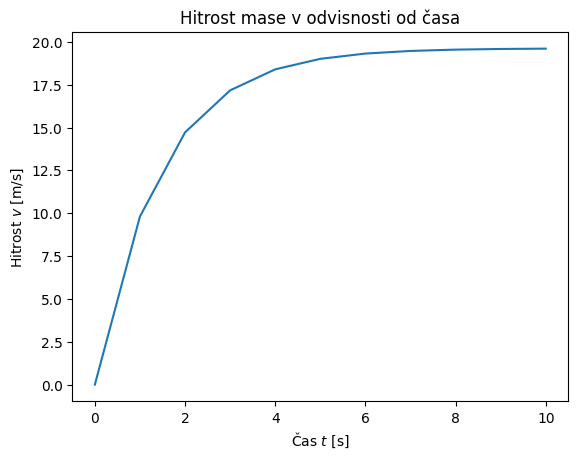

In [9]:
plt.plot(t, y)
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.show()

Preverimo sedaj vpliv časovnega koraka:

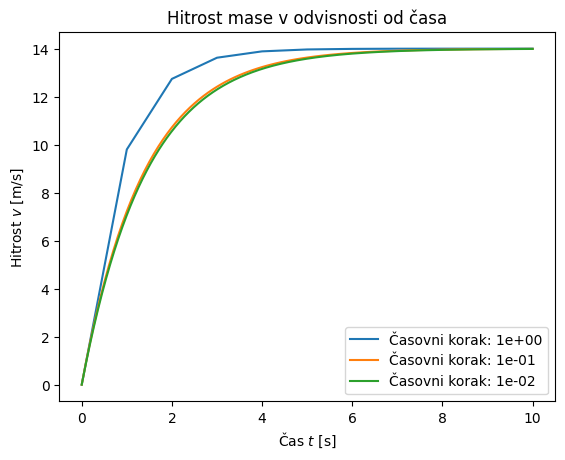

In [10]:
for n in [11, 101, 1001]:
    t = np.linspace(0, 10, n)
    y = euler(f_zračni_upor, t, y0=v0, c=0.7)
    plt.plot(t, y, label=f'Časovni korak: {t[1]:1.0e}')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

Opazimo, da se numerična napaka pri spremembi koraka iz 1 na 0,1 bistveno zmanjša!

Ocenimo še napako pri 100 in 1000 odsekih:

In [11]:
n=101
t = np.linspace(0, 10, n)
euler_napaka(f_zračni_upor, t, y0=v0)

In [12]:
n=1001
t = np.linspace(0, 10, n)
euler_napaka(f_zračni_upor, t, y0=v0)

Ko smo korak zmanjšali na desetino, se je proporcionalno zmanjšala tudi napaka (prvi red napake).

Poglejmo še primer, ko je zračni upor `c` argument funkcije `euler` in je prek `**kwargs` posredovan v funkcijo `f_zračni_upor()`:

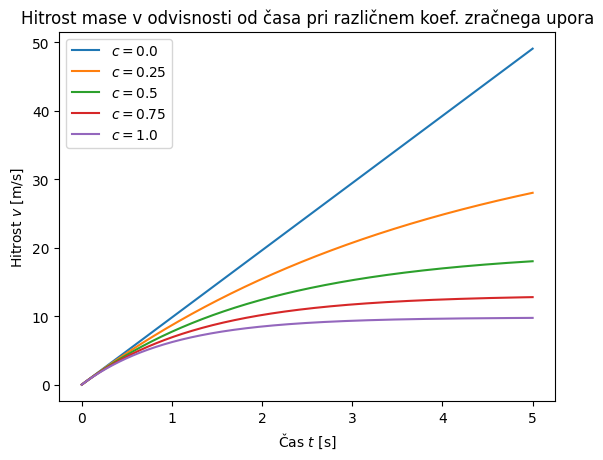

In [13]:
for c in np.linspace(0, 1, 5):
    t = np.linspace(0, 5, 1001)
    y = euler(f_zračni_upor, t, y0=v0, c=c)
    plt.plot(t, y, label=f'$c={c}$')
plt.title('Hitrost mase v odvisnosti od časa pri različnem koef. zračnega upora')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

## Metoda Runge-Kutta drugega reda

Eulerjeva metoda je prvega reda (prvega reda je namreč globalna napaka $\mathcal{O}(h)$). Če bi želeli izpeljati metodo drugega reda napake, bi si morali pomagati z razvojem $y(t+h)$ v Taylorjevo vrsto, kjer bomo zanemarili tretji in višje odvode:

$$y(t+h)=y(t)+y'(t)\,h + \frac{1}{2}y''(t)\,h^2+\mathcal{O}(h^3).$$

Lokalna napaka metode bo tako tretjega reda, globalna pa drugega reda.

Uporabimo zamenjavi $y'(t)=f(t,y)$ in $y''(t)=f'(t,y)$:

$$y(t+h)=y(t)+f(t,y)\,h + \frac{1}{2}f'(t,y)\,h^2+\mathcal{O}(h^3).$$

Ker je desna stran $f(t,y)$ odvisna od neodvisne $t$ in odvisne spremenljivke $y$, moramo uporabiti implicitno odvajanje:

$$f'(t,y)=\frac{\partial f(t,y)}{\partial t}+\frac{\partial f(t,y)}{\partial y}\,\underbrace{\frac{\textrm{d} y}{\textrm{d} t}}_{y'=f(t,y)}
=\frac{\partial f(t,y)}{\partial t}+\frac{\partial f(t,y)}{\partial y}\,{f(t, y)}.$$

Vstavimo v izraz za Taylorjevo vrsto:

$$y(t+h)_{\textrm{Taylor}}=y(t+h)=y(t)+f(t,y)\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial f(t,y)}{\partial t}+\frac{\partial f(t,y)}{\partial y}\,{f(t, y)}
{\LARGE)}\,h^2.$$

Kot je razvidno iz zgornjega izraza, potrebujemo dodatne odvode. To predstavlja določeno težavo, ki se ji lahko izognemo na različne načine; v nadaljevanju si bomo pogledali pristop *Runge-Kutta*. Ker bomo zgornji izraz pozneje še potrebovali, smo ga tukaj poimenovali $y(t+h)_{\textrm{Taylor}}$.

### Ideja pristopa Runge-Kutta

Zgornjo dilemo metoda *Runge-Kutta* (razvita leta 1901) rešuje z idejo, ki smo jo sicer že srečali pri Gaussovi integraciji: točnejšo rešitev poskuša najti z uteženo dodatno vrednostjo funkcije $f$:

$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+c_0\,f\left(t,y\right)\,h +c_1
\underbrace{f{\large(}t+p\,h,y+q\,h\,f(t,y){\large)}}_{A}\,h.$$

kjer so $c_0$, $c_1$, $p$ in $q$ neznane konstante (načeloma od 0 do vključno 1). Če bi v zgornjem izrazu uporabili $c_1=0$, bi izpeljali metodo prvega reda; z dodatno funkcijsko vrednostjo ($A$) pa se bo izkazalo, da  bomo izpeljali metodo drugega reda. 

Iskanje neznanih konstant $c_0$, $c_1$, $p$, $q$ nadaljujemo z zapisom $A$ v obliki Taylorjeve vrste prvega reda:

$$f{\large(}t+p\,h,y+q\,h\,f(t,y){\large)}=
\underbrace{
f{\large(}t,y{\large)}+
\frac{\partial f(t,y)}{\partial t}\,\left(p\,h\right)+
\frac{\partial f(t,y)}{\partial y}\,\left(q\,h\,f(t, y)\right)
}_{B}.$$

Vstavimo sedaj izpeljani $B$ nazaj v izraz za $y(t+h)_{\textrm{Runge-Kutta}}$:

$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+c_0\,f\left(t,y\right)\,h +c_1
{\LARGE(}
f{\large(}t,y{\large)}+
\frac{\partial f(t,y)}{\partial t}\,\left(p\,h\right)+
\frac{\partial f(t,y)}{\partial y}\,\left(q\,h\,f(t, y)\right)
{\LARGE)}
\,h.$$

Nadaljujemo z izpeljevanjem in enačbo preoblikujemo, da bo podobna zgoraj izpeljani s Taylorjevo vrsto $y(t+h)_{\textrm{Taylor}}$:

$$y(t+h)_{\textrm{Runge-Kutta}}=y(t)+(c_0+c_1)\,f\left(t,y\right)\,h +\frac{1}{2}
{\LARGE(}
\frac{\partial f(t,y)}{\partial t}\,2\,c_1\,p+
2\,c_1\,q\,\frac{\partial f(t,y)}{\partial y}\,f(t, y)
{\LARGE)}
\,h^2.$$

Primerjajmo sedaj z zgoraj izpeljanim izrazom:

$$y(t+h)_{\textrm{Taylor}}=y(t)+f(t,y)\,h + \frac{1}{2}\,{\LARGE(}
\frac{\partial f(t,y)}{\partial t}+\frac{\partial f(t,y)}{\partial y}\,{f(t, y)}
{\LARGE)}\,h^2.$$

Ugotovimo, da za enakost mora veljati:

$$c_0+c_1=1,\qquad 2\,c_1\,p=1,\qquad 2\,c_1\,q=1.$$

Imamo torej tri enačbe in štiri neznanke. Eno od konstant si tako lahko poljubno izberemo, ostale tri pa izračunamo. Če na primer izberemo $c_0=0$, bi to imenovali *spremenjena Eulerjeva metoda* in bi ostali parametri bili: $c_1=1$, $p=q=1/2$. Izbira parametrov nima bistvenega vpliva na rešitev. Sicer pa velja omeniti, da tudi metodo Runge-Kutta drugega reda redko uporabljamo, saj obstajajo boljše metode.

Parametre $c_0$, $c_1$, $p$ in $q$ vstavimo v prvo enačbo tega poglavja. Ko je definiran začetni čas $t_0$ in začetni pogoj $y_0$, uporabimo metodo Runge-Kutta drugega reda:

$$y_{i+1} = y_i + f\left(t_i+\frac{1}{2}\,h, y_i+\frac{1}{2}\,h\,f(t_i,y_i)\right)\,h.$$

## Metoda Runge-Kutta četrtega reda

Podobno kot smo izpeljali metodo Runge-Kutta drugea reda, se izpelje metodo Runge Kutta četrtega reda. Tudi pri metodi četrtega reda obstaja več različic in kot metoda Runge-Kutta četrtega reda razumemo naslednjo metodo:

$$y_{i+1}=y_i+\frac{1}{6}(k_0+2\,k_1+2\,k_2+k_3),$$

kjer so:

$$\begin{align}
k_0&=h\,f(t_i,y_i)\\
k_1&=h\,f\left(t_i+\frac{h}{2},y_i+\frac{k_0}{2}\right)\\
k_2&=h\,f\left(t_i+\frac{h}{2},y_i+\frac{k_1}{2}\right)\\
k_3&=h\,f\left(t_i+h,y_i+k_2\right).
\end{align}
$$

Koraki metode Runge-Kutta četrtega reda so:

1. Določitev $i=0$ in $t_0$, $y_0=y(t_0)$,
2. Izračun koeficintov: $k_0$, $k_1$, $k_2$, $k_3$,
3. Izračun vrednosti rešitve diferencialne enačbe pri $t_{i+1}=t_i+h$:   $\quad y_{i+1}=y_i+\frac{1}{6}(k_0+2\,k_1+2\,k_2+k_3),$
4. $i=i+1$ in nadaljevanje v koraku 2.

### Napaka metode Runge-Kutta četrtega reda

Metodo Runge-Kutta četrtega reda imenujemo tako zato, ker ima lokalno napako petega reda $\mathcal{O}(h^5)$, vendar pa to napako naredimo $n$-krat, zato je globalna napaka četrtega reda $\mathcal{O}(h^4)$. 

#### Ocena napake

Točen rezultat $y(t_n)$ pri velikosti koraka $h$ je:

$$y(t_n)=y_{n,h}+E_h,$$

kjer je $y_{n,h}$ numerični približek rešitve in $E_h$ napaka metode. Ker je globalna napaka četrtega reda, lahko napako zapišemo tako:

$$E_h=k\,h^4.$$

Podobno lahko za velikost koraka $2h$ zapišemo:

$$y(t_n)=y_{n,2h}+E_{2h},$$

kjer je $y_{n,2h}$ numerični približek rešitve in $E_{2h}$ napaka metode:

$$E_{2h}=k\,(2\,h)^4=16\,k\,h^4.$$

Ob predpostavki, da je konstanta $k$ pri koraku $h$ in koraku $2h$ enaka, lahko izračunamo oceno napake pri boljšem približku $E_h$. 

Najprej je res:

$$y_{n,h}+k\,h^4=y_{n,2h}+16\,k\,h^4,$$

sledi:

$$15\,k\,h^4=y_{n,h}-y_{n,2h}$$

in nato določimo *oceno napake* natančnejše rešitve:

$$E_h=\frac{y_{n,h}-y_{n,2h}}{15}.$$

### Numerična implementacija

In [14]:
def runge_kutta_4(f, t, y0, *args, **kwargs):
    """
    Metoda Runge-Kutta 4. reda za reševanje diferencialne enačbe: y' = f(t, y)
    
    :param f: funkcija, ki jo kličemo s parametroma t in y in vrne 
              vrednost prvega odvoda
    :param t: ekvidistanten časovni vektor oz. neodvisna spremenljivka
    :param y0: začetna vrednost
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: funkcijske vrednosti.
    """
    def RK4(f, t, y, *args, **kwargs):
        k0 = h*f(t, y, *args, **kwargs)
        k1 = h*f(t + h/2.0, y + k0/2.0, *args, **kwargs)
        k2 = h*f(t + h/2.0, y + k1/2.0, *args, **kwargs)
        k3 = h*f(t + h, y + k2, *args, **kwargs)
        return (k0 + 2.0*k1 + 2.0*k2 + k3)/6.0
    
    y = np.zeros_like(t)
    y[0] = y0
    h = t[1]-t[0]

    for i, ti in enumerate(t[1:]):
        y[i+1] = y[i] + RK4(f, ti, y[i], *args, **kwargs)
        
    return y

Funkcija za oceno napake:

In [15]:
def runge_kutta_4_napaka(f, t, y0, *args, **kwargs):
    """ Ocena napake metode Runge Kutta 4; argumenti isti kakor za `runge_kutta_4`
    """
    n = len(t)
    if n < 5:
        raise Exception('Vozlišč mora biti vsaj 5.')
    if n%2==0: # sodo vozlišč; odstrani eno točko in spremeni na liho (da je sodo odsekov)
        n = n - 1
    y_h = runge_kutta_4(f, t[:n], y0, *args, **kwargs)
    y_2h = runge_kutta_4(f, t[:n:2], y0, *args, **kwargs)
    E_h = (y_h[-1] - y_2h[-1])/15
    return E_h

### Numerični zgled

Poglejmo sedaj primer izračuna hitrosti padajoče mase:

In [16]:
def f_zračni_upor(t, y, g=9.81, m=1., c=0.5):
    return g-c*y/m

Podajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [17]:
v0 = 0
t = np.linspace(0, 10, 11)
t

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Za primerjavo izračunajmo rešitev s funkcijo `euler` ter `runge_kutta_4`:

In [18]:
y_euler = euler(f_zračni_upor, t, y0=v0, c=0.4)
y_rk4 = runge_kutta_4(f_zračni_upor, t, y0=v0, c=0.4)

Prikažemo rezultat:

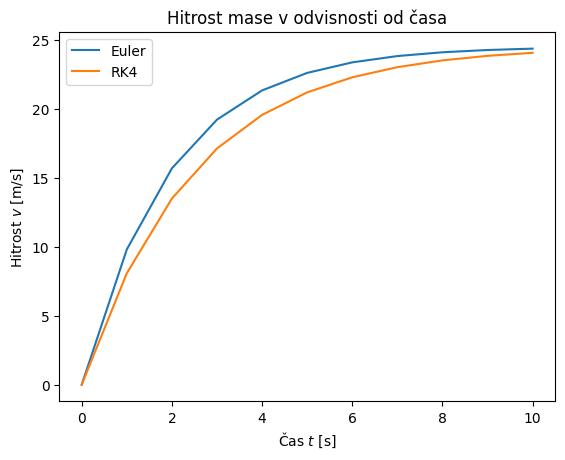

In [19]:
plt.plot(t, y_euler, label='Euler')
plt.plot(t, y_rk4, label='RK4')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

Poglejmo še numerično napako:

In [20]:
n=101
t = np.linspace(0, 10, n)
runge_kutta_4_napaka(f_zračni_upor, t, y0=v0, c=0.4)

In [21]:
n=1001
t = np.linspace(0, 10, n)
runge_kutta_4_napaka(f_zračni_upor, t, y0=v0, c=0.4)

Pri zmanjšanju koraka na desetino, se je napaka zmanjšala za približno $10^4$-krat (kar ustreza pričakovanjem za metodo četrtega reda).

## Uporaba ``scipy`` za reševanje navadnih diferencialnih enačb

Paket `scipy` ima implementiranih [veliko numeričnih metod](https://docs.scipy.org/doc/scipy/reference/integrate.html#solving-initial-value-problems-for-ode-systems) za reševanje začetnih problemov navadnih diferencialnih enačb. Tukaj si bomo ogledali funkcijo `scipy.integrate.solve_ivp`, ki je primerna za večino začetnih problemov.

### `scipy.integrate.solve_ivp`

Sintaksa za uporabo (IVP - *angl.* Initial Value Problem):
```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', 
                          t_eval=None, dense_output=False, 
                          events=None, vectorized=False, 
                          args=None, **options)
```


Pojasnilo vseh argumentov je v [dokumentaciji](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy-integrate-solve-ivp), tukaj bomo izpostavili nekatere:

* `fun` je desna stran (`func(t, y...)`),
* `t_span` terka (`t0`, `tf`), ki definira začetni `t0` in končni čas `tf`,
* `y0` **seznam** začetne(ih) vrednosti,
* `method` definira numerično metodo (privzeta je eksplicitna 'RK45', za toge sisteme pa so boljše: 'Radau', 'BDF', 'LSODA'),
* `t_eval` uporabimo, če želimo rešitve ob določenih vrednosti neodvisne spremenljivke, 
* `dense_output` ali se pripravi tudi zvezna rešitev, privzeto `False`,
* `events` za sledenje dogodkov, ki ustavijo reševanje začetnega problema (npr. ko se masa dotakne tal in je relativna razdalja do tal nič).
* `args` za posredovanje argumentov v funkcijo `fun` (glejte primer spodaj).

Rezultat klicanja `solve_ivp` je objekt z atributi (izbrani):

* `t` vrednosti neodvisne spremenljivke pri katerih je izračunan rezultat,
* `y` rezultat,
* `sol` funkcija zvezne rešitve (samo v primeru `dense_output=True`)
* `success` je `True`, če je bila rešitev uspešno izračunana ali prekinjena zaradi dogodka (`events`).

#### Numerični zgled

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat (prikažemo samo prvih deset elementov):

In [22]:
v0 = 0
t = np.linspace(0, 10, 101)
t[:10]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

Argumente (`g=9.81, m=1., c=0.4`) v funkcijo posredujemo prek parametra `args`:

In [23]:
from scipy.integrate import solve_ivp
y_ivp = solve_ivp(f_zračni_upor, t_span=(t[0], t[-1]), y0=[v0], args=(9.81, 1, 0.4))

Lahko bi pa uporabili tudi `lambda` izraza ([dokumentacija](https://docs.python.org/tutorial/controlflow.html#lambda-expressions)):
```python
y_ivp = solve_ivp(lambda t,y: f_zračni_upor(t, y, c=0.4), t_span=(t[0], t[-1]), y0=[v0])
```

Zgoraj uporabljen `lambda` izraz `lambda t, y: f_zračni_upor(t, y, c=0.4)` je ekvivalenten:

```python
def ime_funkcije(t, y):
    return f_zračni_upor(t, y, c=0.4)
```

Poglejmo rezultat:

In [24]:
y_ivp

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-04  1.100e-03  1.110e-02  1.111e-01
             1.111e+00  2.982e+00  5.236e+00  7.948e+00  1.000e+01]
        y: [[ 0.000e+00  9.810e-04  1.079e-02  1.086e-01  1.066e+00
              8.800e+00  1.708e+01  2.150e+01  2.350e+01  2.407e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 56
     njev: 0
      nlu: 0

Ker je `solve_ivp` že pripravljen za sistem navadnih diferencialnih enačb prvega reda, je rezultat podan v dveh dimenzijah. Iskan rezultat je torej: `y_ivp.y[0]`.

Za primerjavo še rezultat z lastno implementacijo Runge-Kutta 4. reda:

In [25]:
y_rk4 = runge_kutta_4(f_zračni_upor, t, y0=v0, c=0.4)

In [26]:
y_rk4[:10]

array([0.        , 0.96163898, 1.88557156, 2.77327623, 3.6261735 ,
       4.44562819, 5.23295161, 5.98940363, 6.71619474, 7.41448797])

Prikažemo rezultat:

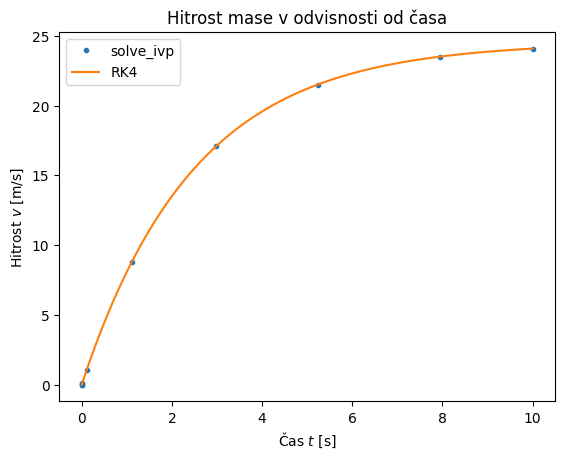

In [27]:
plt.plot(y_ivp.t, y_ivp.y[0], '.', label='solve_ivp')
plt.plot(t, y_rk4, label='RK4')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

## Sistem navadnih diferencialnih enačb

Zgoraj smo si pogledali reševanje začetnega problema ene navadne diferencialne enačbe; sedaj bomo reševanje posplošili na *začetni problem za sistem $m$ navadnih diferencialnih enačb prvega reda*. 

Takšen sistem zapišemo:

$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}),$$

kjer so podani dodatni (začetni) pogoji:

$$\mathbf{y}(t_0)=\mathbf{y}_0.$$

S $t$ smo označili neodvisno spremenljivko (ni nujno, da je to vedno čas) in $\mathbf{f}$ vektor desnih strani.

Računamo rešitev sistema $m$ diferencialnih enačb $\mathbf{y}'=\mathbf{f}(t, \mathbf{y})$ pri $a=t_0, t_1,\dots,t_{n-1}=b$, to je $m$ funkcijskih vrednosti na vsakem koraku $y_k(t_i)$, $k=0,1,\dots,m-1$ in $i=0,1,\dots,n-1$. Lahko se dokaže, da lahko uporabimo vsako metodo, ki smo jo izpeljali za diferencialne enačbe prvega reda tudi za sistem navadnih diferencialnih enačb prvega reda, če zamenjamo skalarne veličine z ustreznimi vektorskimi.

### Numerična implementacija

Metodi Euler in Runge-Kutta četrtega reda potrebujeta zgolj malenkostne popravke (`y0` je numerično polje, `f` vrne seznam vrednosti odvodov):

In [28]:
def euler_sistem(f, t, y0, *args, **kwargs):
    """
    Eulerjeva metoda za reševanje sistema navadnih diferencialnih enačb prvega reda : y' = f(t, y)
    
    :param f:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               funkcij desnih strani
    :param t:  ekvidistantni (časovni) vektor neodvisne spremenljivke
    :param y0: seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` funkcijskih vrednosti.
    """
    y = np.zeros((t.shape[0], len(y0)))
    y[0] = np.copy(y0)
    h = t[1]-t[0]
    for i, ti in enumerate(t[:-1]):
        # tukaj je bistvo Eulerjeve metode
        y[i+1] = y[i]+f(ti, y[i], *args, **kwargs)*h
    return y

In [29]:
def runge_kutta_4_sistem(f, t, y0, *args, **kwargs):
    """
    Metoda Runge-Kutta 4. reda za reševanje sistema navadnih diferencialnih enačb prvega reda: y' = f(t, y)
    
    :param f:  funkcija, ki jo kličemo s parametroma t in y in vrne seznam 
               funkcij desnih strani
    :param t:  ekvidistantni (časovni) vektor neodvisne spremenljivke
    :param y0: seznam začetnih vrednosti
    :param args: dodatni argumenti funkcije f (brezimenski)
    :param kwargs: dodatni argumenti funkcije f (poimenovani)
    :return y: vrne np.array ``y`` funkcijskih vrednosti.
    """
    def RK4(g, t, y, *args, **kwargs):
        k0 = h*f(t, y, *args, **kwargs)
        k1 = h*f(t + h/2.0, y + k0/2.0, *args, **kwargs)
        k2 = h*f(t + h/2.0, y + k1/2.0, *args, **kwargs)
        k3 = h*f(t + h, y + k2, *args, **kwargs)
        return (k0 + 2.0*k1 + 2.0*k2 + k3)/6.0
    
    y = np.zeros((t.shape[0], len(y0)))
    y[0] = np.copy(y0)
    h = t[1]-t[0]

    for i, ti in enumerate(t[1:]):
        y[i+1] = y[i] + RK4(f, ti, y[i], *args, **kwargs)
        
    return y

#### Numerični zgled

Padanje mase nadgradimo v ravninsko gibanje; velikost sile upora zraka naj bo definirana kot:

$$|\mathbf{F}(\mathbf{v})|=c\,|\mathbf{v}|^2.$$

Sila upora zraka deluje v nasprotno stran kot kaže vektor hitrosti.
![Padanje telesa vezano](./fig/padanje_telesa_vezano.png)

Ob pomoči slike, definiramo silo v $x$ smeri:

$$F_x=-c\,\left(v_x^2+v_y^2\right)\,\cos(\alpha)=-c\,\left(v_x^2+v_y^2\right)\,\frac{v_x}{\sqrt{v_x^2+v_y^2}}=-c\,v_x\,\sqrt{v_x^2+v_y^2}.$$

Podobno je sila v $y$ smeri:

$$F_y=-c\,v_y\,\sqrt{v_x^2+v_y^2}.$$

Glede na drugi Newtonov zakon zapišemo sistem dveh (vezanih) diferencialnih enačb prvega reda:

$$F_x=m\,v_x',$$

$$m\,g+F_y=m\,v_y',$$

$m$ je masa, $g$ gravitacijski pospešek, $c$ koeficient zračnega upora ter $v_x$ in $v_y$ hitrost v $x$ oz $y$ smeri. Diferencialno enačbo bi želeli rešiti glede na začetni pogoj:

$$v_x(0)=v_y(0)=5\,\textrm{m/s}.$$

Definirajmo seznam desnih strani:

In [30]:
def f_zračni_upor_sila(t, y,  g=9.81, m=1., c=0.5):
    vx, vy = y
    return np.array([-c*vx*np.sqrt(vx**2+vy**2)/m, g-c*vy*np.sqrt(vx**2+vy**2)/m])

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [31]:
y0 = np.array([5., 5.])
t = np.linspace(0, 5, 101)
t[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Za primerjavo izračunajmo rešitev s funkcijo `runge_kutta_4` ter `solve_ivp`:

In [32]:
y_RK4 = runge_kutta_4_sistem(f_zračni_upor_sila, t=t, y0=y0)
y_ivp = solve_ivp(f_zračni_upor_sila, t_span=(t[0], t[-1]), y0=y0, t_eval=t)

Poglejmo rezultat:

In [33]:
y_ivp.y[:,:5]

array([[5.        , 4.23209907, 3.63858619, 3.16619484, 2.78087608],
       [5.        , 4.68459713, 4.48359747, 4.35932897, 4.28742151]])

In [34]:
y_RK4[:5].T

array([[5.        , 4.23211316, 3.6399137 , 3.16660748, 2.77780226],
       [5.        , 4.68462761, 4.48494405, 4.35999931, 4.28466858]])

Prikažemo rezultat:

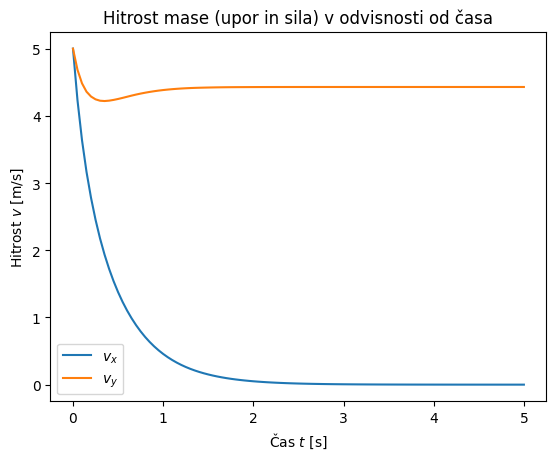

In [35]:
plt.plot(t, y_ivp.y[0], label='$v_x$')
plt.plot(t, y_ivp.y[1], label='$v_y$')
plt.title('Hitrost mase (upor in sila) v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost $v$ [m/s]')
plt.legend()
plt.show()

### Preoblikovanje diferencialne enačbe višjega reda v sistem diferencialnih enačb prvega reda

Pogledali si bomo, kako navadno diferencialno enačbo poljubnega reda $n$:

$$y^{(n)}=f(t, y, y', y'',\dots,y^{(n-1)}),$$

pri začetnih pogojih:

$$y(t_0)=k_0,\quad y'(t_0)=k_1,\quad\dots\quad y^{(n-1)}(t_0)=k_{n-1}$$

preoblikujemo v sistem diferencialnih enačb prvega reda.

Najprej namesto odvodov vpeljemo nove spremenljivke: 

$$y_i=y^{(i)}, \qquad i=0,1,\dots,n-1.$$

Diferencialna enačba $n$-tega reda zapisana z novimi spremenljivkami je:

$$y_{n-1}'=f(t, y_0, y_1, y_2,\dots,y_{n-1}).$$

Nove funkcije odvajamo po neodvisni spremenljivki:

$$y_i'=y^{(i+1)}=y_{i+1}, \qquad i=0,1,\dots,n-2$$
in

$$y_{n-1}'=f(t, y_0, y_1, y_2,\dots,y_{n-1}).$$

Dobili smo sistem navadnih diferencialnih enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&y_2\\
&\dots\\
y_{n-1}'&=&f(t, y_0, y_1, y_2,\dots,y_{n-1})\\
\end{array}
$$

pri začetenih pogojih:

$$y_0(t_0)=k_0,\quad y_1(t_0)=k_1,\quad\dots\quad y_{(n-1)}(t_0)=k_{n-1}.$$

#### Numerični zgled

Vrnemo se  k padajoči masi:
![Nosilec](./fig/padanje_telesa_vezano.png)

Vendar tokrat drugi Newtonov zakon zapišimo glede na pomik (diferencialna enačba drugega reda):

$$F_x=m\,x'',$$

$$m\,g+F_y=m\,y'',$$

$m$ je masa, $g$ gravitacijski pospešek, $c$ koeficient zračnega upora ter $x''$ in $y''$ pospešek v izbranem koordinatnem sistemu. Začetni pogoji:

$$x(0)=y(0)=0\,\textrm{m}\qquad\textrm{in}\qquad x'(0)= y'(0)=5\,\textrm{m/s}.$$

Imamo sistem dveh diferencialnih enačb drugega reda. Z uvedbo novih spremenljivk $y_i$: 

$$y_0= x,\quad y_1= x',\quad y_2= y,\quad y_3= y'.$$

Pripravimo sistem diferencialnih enačb prvega reda:

$$
\begin{array}{rcl}
y_0'&=&y_1\\
y_1'&=&F_x/m\\
y_2'&=&y_3\\
y_3'&=&g+F_y/m
\end{array}
$$

Definirajmo Pythonovo funkcijo desnih strani / prvih odvodov:

In [36]:
def f_zračni_upor_vezana(t, y, g=9.81, m=1., c=0.5):
    x, vx, y, vy = y
    return np.array([vx, -c*vx*np.sqrt(vx**2+vy**2)/m, vy, g-c*vy*np.sqrt(vx**2+vy**2)/m])

Definirajmo začetni pogoj in časovni vektor, kjer nas zanima rezultat:

In [37]:
y0 = np.array([0., 5., 0., 5.])
t = np.linspace(0, 5, 101)
t[:5]

array([0.  , 0.05, 0.1 , 0.15, 0.2 ])

Izračunamo rešitev:

In [38]:
y_ivp = solve_ivp(f_zračni_upor_vezana, t_span=(t[0], t[-1]), y0=y0, t_eval=t)

Poglejmo rezultat ($[x, x', y, y']$):

In [39]:
y_ivp.y[:,:5]

array([[0.        , 0.22992477, 0.42611996, 0.59587483, 0.74424286],
       [5.        , 4.23183658, 3.64002431, 3.16703014, 2.77775353],
       [0.        , 0.24153615, 0.47038377, 0.69124852, 0.9072755 ],
       [5.        , 4.68435696, 4.48497294, 4.36034218, 4.28444004]])

Prikažemo rezultate; najprej hitrost, nato lego ($y$ koordinata je pozitivna navzdol)!

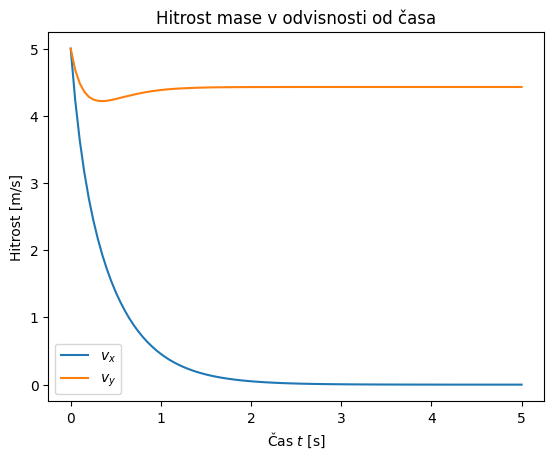

In [40]:
plt.plot(t, y_ivp.y[1], label='$v_x$')
plt.plot(t, y_ivp.y[3], label='$v_y$')
plt.title('Hitrost mase v odvisnosti od časa')
plt.xlabel('Čas $t$ [s]')
plt.ylabel('Hitrost [m/s]')
plt.legend()
plt.show()

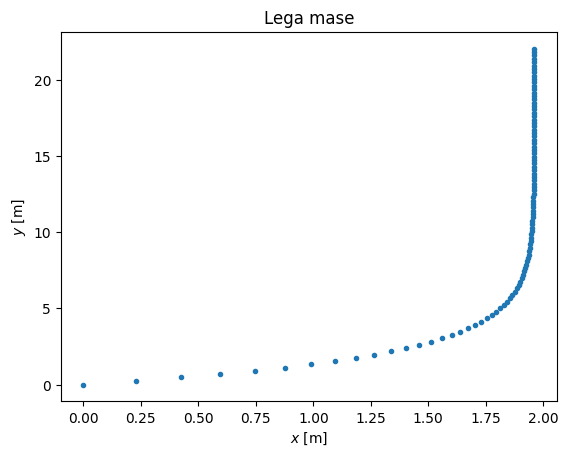

In [41]:
plt.scatter(y_ivp.y[0], y_ivp.y[2], marker='.')
plt.xlabel('$x$ [m]')
plt.ylabel('$y$ [m]')
plt.title('Lega mase')
plt.show()

## Stabilnost reševanja diferencialnih enačb*

Numerično reševane diferencialnih enačb je izpostavljeno *napaki metode* in *zaokrožitveni napaki*. Te napake so pri različnih numeričnih metodah različne. 

Reševanje diferencialne enačbe je **stabilno**, če majhna sprememba začetnega pogoja vodi v majhno spremembo izračunane rešitve; sicer govorimo o **nestabilnosti reševanja**.

Stabilnost je odvisna od diferencialne enačbe, od uporabljene numerične metode in od koraka integracije $h$.

### Primer preprostega nihala

Poglejmo si najprej primer reševanja diferencialne enačbe preprostega nihala.
![Slika nihala](./fig/Slavic-slika-3.6.png)

Slika (vir: Slavič, Dinamika, mehanska nihanja in mehanika tekočin, 2017) prikazuje dinamski sistem (masa $m$, togost $k$), katerega diferencialna enačba je

$$m\, x'' + k\,x=0.$$

Tako diferencialno enačbo preoblikujemo v standardno obliko lastnega nihanja:

$$x'' + \omega_0^2\,x=0,$$

kjer je lastna krožna frekvenca:

$$\omega_0=\sqrt{\frac{k}{m}}$$

in pričakujemo odziv oblike:

$$x(t)=A\,\cos(\omega_0\,t)+B\,\sin(\omega_0\,t).$$

Če so začetni pogoji:

$$x(0\,\textrm{s})=x_0\qquad\textrm{in}\qquad x'(0\,\textrm{s})=0\,\textrm{m/s},$$

je rešitev začetnega problema:

$$x(t)=x_0\,\cos(\omega_0\,t).$$

#### Numerični zgled

Najprej definirajmo vektor začetnih pogojev in funkcijo desnih strani / prvih odvodov (diferencialno enačbo drugega reda pretvorimo v sistem diferencialnih enačb prvega reda $\mathbf{y}'=\mathbf{f}(t, \mathbf{y})$), kjer velja $y_0=x, y_1=x'$:

In [42]:
def f_nihalo(t, y, omega0=2*np.pi):
    """
    Funkcija desnih strani za nihalo z eno prostostno stopnjo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param omega: lastna krožna frekvenca
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], -omega0**2*y[0]])

Definirajmo podatke in analitično rešitev:

In [43]:
x0 = 1.
omega0 = 2*np.pi
x_zacetni_pogoji = np.array([x0, 0.])
t1 = 4.
cas = np.linspace(0, t1, 500)
pomik = x0*np.cos(omega0*cas) # analitična rešitev
hitrost = -x0*omega0*np.sin(omega0*cas) # analitična rešitev

Rešitev s pomočjo metod Euler in Runge-Kutta četrtega reda:

In [44]:
t_Eu = np.linspace(0, t1, 101)
t_RK4 = t_Eu
dt = t_Eu[1]

x_Eu = euler_sistem(f_nihalo, t_Eu, x_zacetni_pogoji)
x_RK4 = solve_ivp(f_nihalo, t_span=(t_RK4[0], t_RK4[-1]), y0=x_zacetni_pogoji, t_eval=t_RK4).y

Prikažimo rezultate:

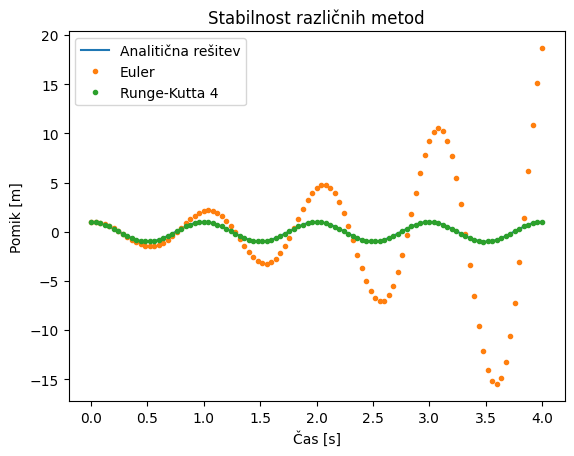

In [45]:
plt.plot(cas, pomik, label='Analitična rešitev')
plt.plot(t_Eu, x_Eu[:,0], '.', label='Euler')
plt.plot(t_RK4, x_RK4[0], '.', label='Runge-Kutta 4')
plt.legend()
plt.title('Stabilnost različnih metod')
plt.ylabel('Pomik [m]')
plt.xlabel('Čas [s]')
plt.show()

Opazimo, da je Eulerjeva metoda nestabilna in če bi povečali korak, bi postala nestabilna tudi metoda Runge-Kutta četrtega reda.

#### Zakaj je Eulerjeva metoda tako nestabilna?

In [46]:
x_Eu[:10,0]

array([ 1.        ,  1.        ,  0.93683453,  0.8105036 ,  0.62499707,
        0.3882947 ,  0.1121141 , -0.18859332, -0.49638247, -0.79225904])

Spomnimo se Eulerjeve metode:

$$x(t+h)=x(t)+x'(t)\,h,$$

ki nam pove, da pomik $x(t+h)$ določimo glede na lego $x(t)$ in hitrost $x'(t)$. Začetni pogoji izhajajo iz skrajnega odmika $x(t=0)=1$ in takrat je hitrost $x'(t=0)=0$, kar pomeni, da bo $x(t+h)=1$. Že v prvem koraku torej naredimo razmeroma veliko napako. Vendar zakaj potem začne vrednost alternirajoče naraščati?

Spomnimo se, da je analitična rešitev $x(t)=x_0\,\cos(\omega_0\,t)$ in je torej $x'(t)=-\omega_0\,x_0\,\sin(\omega_0\,t)$. 

Vstavimo pripravljena izraza v Eulerjevo metodo in uredimo:

$$x(t+h)=x(t)+x'(t)\,h=x_0\,\left(\cos(\omega_0\,t)-\omega_0\,h\,\sin(\omega_0\,t)\right).$$

Predpostavimo, da gledamo stanje ob takem času $t=\pi/(2\omega_0)$, ko velja $\cos(\omega_0\,t)=0$ in $\sin(\omega_0\,t)=1$:

$$x(t+h)=x_0\,\underbrace{\left(-\omega_0\,h\right)}_{A}.$$

V kolikor bo absolutna vrednost izraza $A$ večja kot 1, bo pri času $t+h$ vrednost večja kot v predhodnem koraku in v sledečem verjetno spet. Sledi, da lahko pride do nestabilnosti. Da se je izognemo, mora veljati:

$$|A|<1\qquad\rightarrow\qquad h<\frac{1}{\omega_0}.$$

Opomba: v nekaterih knjigah boste videli tudi vrednost $h<2/\omega_0$; enoliče meje za vse diferencialne enačbe ni mogoče definirati; v splošnem pa velja, da je korak definiran relativno glede na najkrajšo periodo $T$ v diferencialni enačbi (npr.: $h<2/\omega_0$ je v bistvu enako $h<2/(2\pi/T)$ oziroma $h<T/\pi$). Perioda $T$ je definirana glede na najvišjo lastno frekvenco sistema $T=1/f_{\textrm{max}}$, ki jo izračunamo iz lastne vrednosti sistema.

# Dodatno: Primer Van der Polovega nihala

Namen tega primera je pokazati, kako lahko izbira integratorja vpliva na hitrost reševanja problema! Van der Polovo nihalo je opisano [tukaj](http://en.wikipedia.org/wiki/Van_der_Pol_oscillator). 

Definirajmo seznam odvodov:

In [47]:
def f_van_der_pol(t, y, mu=1000):
    """
    Funkcija desnih strani za Van der Pol nihalo
    
    :param t: čas
    :param y: seznam začetnih vrednosti
    :param mu: parameter dušenja in nelinearnosti
    :return y': seznam vrednosti odvodov
    """
    return np.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])

In [48]:
x_zacetni_pogoji = np.array([1.5, 0.])
dt = 0.1
t1 = 3000

Rešitev po metodi RK45 (gre za eksplicitno shemo, ki ni primerna za toge sisteme diferencialnih enačb; reševanje je zelo počasno, zato rešitev računamo samo do `t1/100`):

In [49]:
vp_RK45 = solve_ivp(f_van_der_pol, t_span=(0., t1/100), y0=x_zacetni_pogoji, method='RK45')

Implicitna shema BDF (*angl.* Backward Differentiation Formulas) se tukaj izkaže kot bistveno bolj primerna. Zaradi stabilnosti, so koraki lahko bistveno večji in zato je reševanje bistveno hitrejše:

In [50]:
vp_BDF = solve_ivp(f_van_der_pol, t_span=(0., t1), y0=x_zacetni_pogoji, method='BDF')

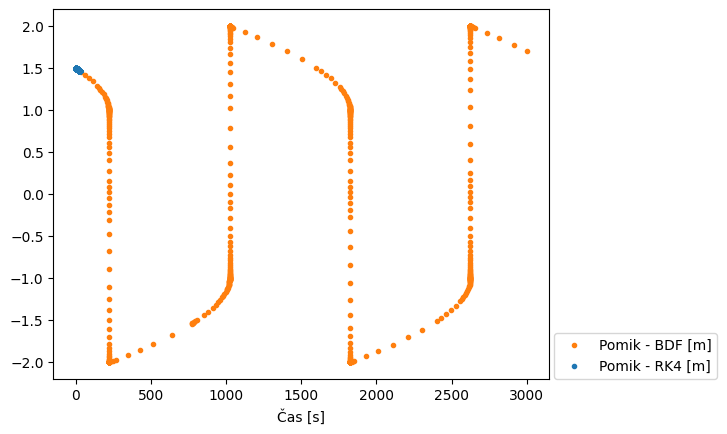

In [51]:
plt.plot(vp_BDF.t, vp_BDF.y[0], 'C1.', label='Pomik - BDF [m]')
plt.plot(vp_RK45.t, vp_RK45.y[0], 'C0.', label='Pomik - RK4 [m]')
plt.xlabel('Čas [s]')
plt.legend(loc=(1.01, 0));

# Dodatno: simbolno reševanje diferencialne enačbe drugega reda

Pogledali si bomo primer, prikazan na sliki, kjer je masa $m$ na klancu naklona $\alpha$. Koeficient trenja je $\mu$, težnostni pospešek pa $g$. Začetna hitrost je $\dot y(0\,\textrm{s})=v_0$, pomik $y(0\,\textrm{s})=0\,\textrm{m}$.
![Masa na klancu](./fig/masa_na_klancu.png)
Gibalna enačba (samo za smer $y$) je definirana glede na II. Newtonov zakon (glejte diagram sil na prosto telo).

#### Izpeljava gibalne enačbe

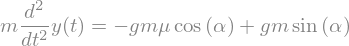

In [52]:
y = sym.Function('y')
m, mu, g, alpha, t, v0 = sym.symbols('m, mu, g, alpha, t, v0')
eq = sym.Eq(m*y(t).diff(t,2),  m*g*sym.sin(alpha)-m*g*sym.cos(alpha)*mu)
eq

Rešitev enačbe je:

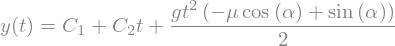

In [53]:
dsol = sym.dsolve(eq, y(t))
dsol

Da določimo $C_1$ in $C_2$, vstavimo $t=0\,\textrm{s}$:

In [54]:
dsol.args[1].subs(t, 0)

Nato odvajamo po času in ponovno vstavimo $t=0\,\textrm{s}$:

In [55]:
dsol.args[1].diff(t).subs(t, 0)

Glede na začetne pogoje smo torej določili konstante:

In [56]:
zacetni_pogoji = {'C1': 0, 'C2': v0}

Sledi rešitev:

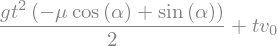

In [57]:
resitev = dsol.args[1].subs(zacetni_pogoji)
resitev

Pripravimo si funkciji za numerični klic:

In [58]:
podatki = {mu: 0.3, alpha: 15*np.pi/180, v0: 1., g: 9.81} #tukaj uporabimo np.pi, da imamo numerično vrednost

pomik = sym.lambdify(t, resitev.subs(podatki), 'numpy')
hitrost = sym.lambdify(t, resitev.diff(t).subs(podatki), 'numpy')

print('Pomik pri 0s: {:g}m'.format(pomik(0)))
print('Hitrost pri 0s: {:g}m/s'.format(hitrost(0)))

Pomik pri 0s: 0m
Hitrost pri 0s: 1m/s


Pripravimo prikaz:

In [59]:
cas = np.linspace(0, 4, 100)
cas2 = np.linspace(0, 4, 5)

In [60]:
def slika():
    plt.plot(cas, pomik(cas), 'C0', label='Pomik [m]')
    plt.plot(cas, hitrost(cas), 'C1', label='Hitrost [m/s]')
    plt.plot(cas2, pomik(cas2), 'C0o', label='Pomik - velik korak[m]')
    plt.plot(cas2, hitrost(cas2), 'C1o', label='Hitrost - velik korak [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.legend(loc=(1.01, 0));
    plt.show()

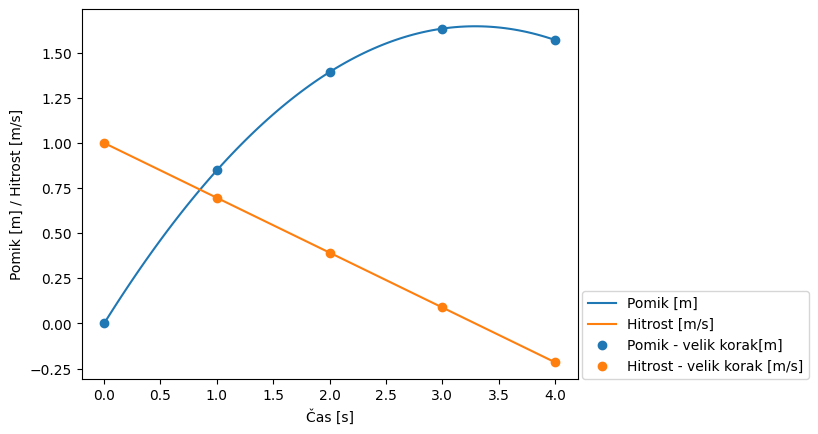

In [61]:
slika()

#### Simbolno preoblikovanje diferencialne enačbe v sistem diferencialnih enačb prvega reda

Spomnimo se izvorne diferencialne enačbe:

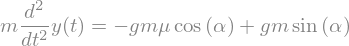

In [62]:
eq

Definirajmo nove spremenljivke in pripravimo funkcijo $f$:

In [63]:
y0 = sym.Function('y0')
y1 = sym.Function('y1')
f = sym.simplify(eq.args[1]/m)
f

Povežimo sedaj nove spremenljivke.

$d y_0/dt$ naj bo enako $y_1$:

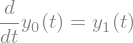

In [64]:
eq1 = sym.Eq(y0(t).diff(t), y1(t))
eq1

Odvod $d y_1/dt$ (v bistvu je to $y''$) naj bo enak funkciji $f$:

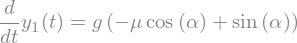

In [65]:
eq2 = sym.Eq(y1(t).diff(t), f)
eq2

Zgornje izraze zapišemo v vektorski obliki:
$$\mathbf{y}'=\mathbf{f}(t, \mathbf{y}).$$

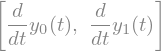

In [66]:
y_odvod = [y0(t).diff(t), y1(t).diff(t)]
y_odvod

In [67]:
f_vec = [y1(t), f]
f_vec

Spomnimo se sedaj ``f_vec``:

In [68]:
f_vec

Če rešujemo numerično, potem funkcijo $\mathbf{f}(t, \mathbf{y})$ zapišemo:

In [69]:
pospesek = float((eq.args[1]/m).simplify().subs(podatki))
pospesek #raziščite zakaj smo tukaj tako definirali! namig: type(pospesek)

In [70]:
def F_klada(t, y):
    return np.array([y[1], pospesek],dtype=float)

Preverimo funkcijo pri začetnem času $t=0\,$s in pri začetnih pogojih $[y_0, y_1]=[0, v_0]$:

In [71]:
y_zacetni_pogoji = np.array([0, podatki[v0]])
y_zacetni_pogoji

array([0., 1.])

In [72]:
F_klada(0., y_zacetni_pogoji)

array([ 1.        , -0.30370487])

Uporabimo sedaj Eulerjevo metodo:

In [73]:
#%%timeit
x_Eu = np.linspace(0, 4, 5)
y_Eu = euler_sistem(F_klada, x_Eu, np.array([0, 1.]))
y_Eu

array([[ 0.        ,  1.        ],
       [ 1.        ,  0.69629513],
       [ 1.69629513,  0.39259025],
       [ 2.08888538,  0.08888538],
       [ 2.17777075, -0.2148195 ]])

Prikažemo in primerjamo z analitično rešitvijo:

In [74]:
def narisi_euler(n=5):
    x_Eu = np.linspace(0, 4, n)
    y_Eu = euler_sistem(F_klada, x_Eu, np.array([0, 1.]))
    plt.title('Eulerjeva metoda s korakom $h={:g}$'.format(x_Eu[1]-x_Eu[0]))
    plt.plot(cas, pomik(cas), 'C0', label='Pomik - analitično [m]')
    plt.plot(cas, hitrost(cas), 'C1', label='Hitrost - analitično [m/s]')
    plt.plot(x_Eu, y_Eu[:, 0], 'C0.', label='Pomik - Euler [m]')
    plt.plot(x_Eu, y_Eu[:, 1], 'C1.', label='Hitrost - Euler [m/s]')
    plt.xlabel('Čas [s]')
    plt.ylabel('Pomik [m] / Hitrost [m/s]')
    plt.ylim(-0.5, 2.5)
    plt.legend(loc=(1.01, 0))
    plt.show();

In [75]:
interact(narisi_euler, n=(3, 10, 1));

interactive(children=(IntSlider(value=5, description='n', max=10, min=3), Output()), _dom_classes=('widget-int…

---

# Vprašanja za vaje

---

**Vprašanje 1**: Diferencialno enačbo:

$$y' - y = sin(x)$$

rešite simbolno z uporabo modula ``sympy``. Prikažite rešitev na intervalu $x\in [0, 5]$ (namig: $y = y(x)$). Vrednosti neznank so pozitivne in realne.

Začetni pogoj: $y(x = 0) = 0$

---

## Eulerjeva metoda

**Vprašanje 2**: Diferencialno enačbo:

$$y' - y = sin(x)$$

rešite še numerično s pripravljeno funkcijo Eulerjeve metode za 30 vrednosti na intervalu $x \in [0, 5]$.

Začetni pogoj: $y(x = 0) = 0$

**Vprašanje 3:** Prikažite vrednosti napake numerične rešitve z Eulerjevo metodo, ko število diskretnih točk na intervalu $x \in [0, 5]$ povečujete od 10 do 100 s korakom 30.

---

## Reševanje navadnih D. E. višjega reda

**Vprašanje 4**: Padalec z maso $m$ je izpostavljen gravitaciji in sili zračnega upora. Gibanje padalca opisuje diferencialna enačba:

$$\ddot{y} = g - \frac{C_D}{m}\dot{y}^2$$

Zapišite sitem diferencialnih enačb prvega reda in pripravite funkcijo za numerično reševanje. Izračunajte vrednosti funkcije prvih odvodov pri začetnem času in začetnih pogojih.

Podatki:
* $g = 9.81 \text{m/s}^2$
* $C_D = 0.203 \text{kg/m}$
* $m = 80 \text{kg}$
* $y(0) = \dot{y}(0) = 0$

------

**Vprašanje 5:** Zgoraj pripravljeno funkcijo uporabite pri numeričnem reševanju diferencialne enačbe padalca s funkcijo ``scipy.integrate.solve_ivp`` pri 100 diskretnih točkah za prvih 30 sekund padca. 

Izrišite dobljen potek poti ($y$) in hitrosti padalca v odvisnosti od časa $t$. Kako bi izračunali tudi pospešek?

**Vprašanje 6**: Izstrelek mase $m$ izstrelimo s hitrostjo $v_0$ pod kotom $\alpha$. Gibalni enačbi za pomike v smereh $x$ in $y$ sta:

$$\ddot{x}(t) = - F~\frac{\text{cos}(\alpha)}{m} \qquad \ddot{y}(t) = -F~\frac{~\text{sin}(\alpha)}{m} - g$$


Sila upora $F$ je enaka $F = c~v^{3/2}$, pri čemer je hitrost $v = \sqrt{\dot{x}^2 + \dot{y}^2}$ in $\alpha = \arctan{\Big(\frac{\dot{y}}{\dot{x}}\Big)}$

<img src="fig/vaje/izstrelek.png" width=300>
<center><font size="1.5">vir: Numerical Methods in Engineering With Python 3, 3rd Ed, Jaan Kiusalaas</font></center>

Sistem dveh diferencialnih enačb drugega reda zapišite v obliki sistema štirih diferencialnih enačb prvega reda in določite vektor začetnih pogojev.

Podatki: 
* $\alpha_0 = \pi/3 ~ \text{rad}$ 
* $v_0 = 32 ~ \text{m/s}$
* $g = 9.81 ~ \text{m/s}^2$
* $c = 0.029 ~ \text{kg}/(\text{ms}^2)$
* $m = 0.41 ~ \text{kg}$

**Vprašanje 7:** Pripravite funkcijo odvodov za numerično reševanje zgornjga sistema dveh diferencialnih enačb 2. reda in z uporabo ``scipy.integrate.solve_ivp`` in določite krivuljo leta izstrelka pri 100 diskretnih točkah v času $t \in [0, 5]$ s.

$$\ddot{x}(t) = - F~\frac{\cos(\alpha)}{m} \qquad \ddot{y}(t) = -F~\frac{\sin(\alpha)}{m} - g$$

Sila upora $F$ je enaka $F = c~v^{3/2}$, pri čemer je hitrost $v = \sqrt{\dot{x}^2 + \dot{y}^2}$ in $\alpha = \arctan{\Big(\frac{\dot{y}}{\dot{x}}\Big)}$

**Vprašanje 8:** Podan sistem dveh diferencialnih enačb drugega reda rešite še s pomočjo funkcije ``scipy.integrate.solve_ivp`` z metodo ``'LSODA'``. 

Sistem enačb integrirajte do časa, ko izstrelek pade na tla ($y = 0$). Uporabite enake začetne pogoje kot pri prejšnji nalogi in maksimalni razmik na časovni osi $\Delta t = 0.1$ s.

Grafično prikažite dobljeno trajektorijo leta izstrelka.